In [210]:
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import STL
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [211]:
def parser(s):
    return datetime.strptime(s, '%Y-%m-%d')

In [212]:
series = pd.read_csv('t', parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
series

,GNRC,CPRT,ODFL,AMD,PAYC,CHTR,MKC,PG,PGR,NEM,CCI,Total,daily_return
Date,,,,,,,,,,,,,
2020-01-02,1020.100021,1121.760040,763.200897,1227.499962,271.799988,490.429993,406.341629,1168.496628,470.026726,327.557129,400.082199,7667.295212,NaN
2020-01-03,1016.699982,1111.920044,754.099594,1214.999962,272.709991,494.470001,412.817688,1160.637894,469.963387,324.601318,402.284821,7635.204681,-0.004185
2020-01-06,1012.500000,1121.879974,748.138000,1209.749985,278.089996,497.450012,415.291710,1162.247467,478.500137,327.860291,398.896179,7650.603752,0.002017
2020-01-07,1029.000015,1120.440033,750.284134,1206.250000,279.489990,499.160004,408.160782,1155.051498,474.845581,327.632874,392.147186,7642.462097,-0.001064
2020-01-08,1000.299988,1128.120026,753.821365,1195.750046,283.119995,500.769989,405.977821,1159.974976,477.651840,318.917236,393.785065,7618.188347,-0.003176
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-24,2331.999969,1484.519989,1186.054138,2295.249939,462.130005,656.489990,458.362694,1336.195831,643.918449,466.508087,448.480453,11769.909546,0.010209
2020-12-28,2330.399933,1520.640015,1166.072113,2289.999962,463.589996,651.900024,458.117485,1345.509949,642.674042,461.417236,455.032928,11785.353683,0.001312
2020-12-29,2213.699951,1511.039978,1161.405762,2265.500069,447.589996,664.979980,464.982872,1342.987366,639.857582,460.722992,453.751556,11626.518105,-0.013477


In [213]:
df=series.asfreq('d')
df=df.fillna(method='ffill')

In [214]:
df

,GNRC,CPRT,ODFL,AMD,PAYC,CHTR,MKC,PG,PGR,NEM,CCI,Total,daily_return
Date,,,,,,,,,,,,,
2020-01-02,1020.100021,1121.760040,763.200897,1227.499962,271.799988,490.429993,406.341629,1168.496628,470.026726,327.557129,400.082199,7667.295212,NaN
2020-01-03,1016.699982,1111.920044,754.099594,1214.999962,272.709991,494.470001,412.817688,1160.637894,469.963387,324.601318,402.284821,7635.204681,-0.004185
2020-01-04,1016.699982,1111.920044,754.099594,1214.999962,272.709991,494.470001,412.817688,1160.637894,469.963387,324.601318,402.284821,7635.204681,-0.004185
2020-01-05,1016.699982,1111.920044,754.099594,1214.999962,272.709991,494.470001,412.817688,1160.637894,469.963387,324.601318,402.284821,7635.204681,-0.004185
2020-01-06,1012.500000,1121.879974,748.138000,1209.749985,278.089996,497.450012,415.291710,1162.247467,478.500137,327.860291,398.896179,7650.603752,0.002017
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-27,2331.999969,1484.519989,1186.054138,2295.249939,462.130005,656.489990,458.362694,1336.195831,643.918449,466.508087,448.480453,11769.909546,0.010209
2020-12-28,2330.399933,1520.640015,1166.072113,2289.999962,463.589996,651.900024,458.117485,1345.509949,642.674042,461.417236,455.032928,11785.353683,0.001312
2020-12-29,2213.699951,1511.039978,1161.405762,2265.500069,447.589996,664.979980,464.982872,1342.987366,639.857582,460.722992,453.751556,11626.518105,-0.013477


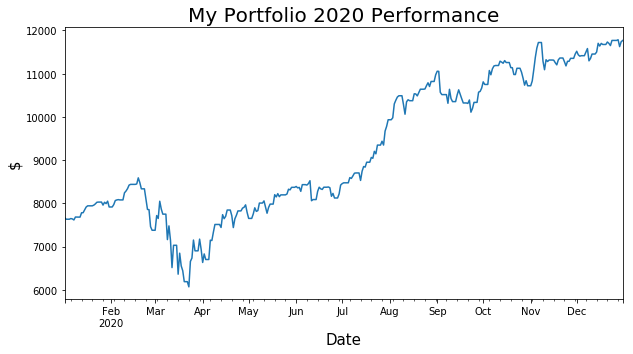

In [215]:
plt.figure(figsize=(10,5))
df['Total'].plot()
plt.title('My Portfolio 2020 Performance',fontsize=20)
plt.xlabel('Date',fontsize=15)
plt.ylabel('$',fontsize=15)
plt.show()

In [216]:
stl=STL(df['Total'])
result = stl.fit()

In [217]:
seasonal,trend,resid = result.seasonal,result.trend, result.resid

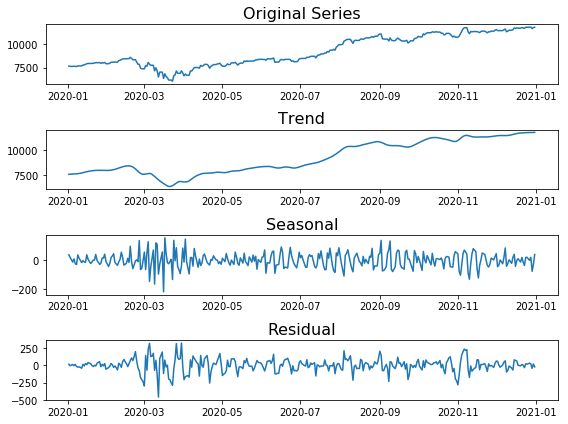

In [218]:
plt.figure(figsize=(8,6))

plt.subplot(4,1,1)
plt.plot(df['Total'])
plt.title('Original Series', fontsize=16)

plt.subplot(4,1,2)
plt.plot(trend)
plt.title('Trend', fontsize=16)

plt.subplot(4,1,3)
plt.plot(seasonal)
plt.title('Seasonal', fontsize=16)

plt.subplot(4,1,4)
plt.plot(resid)
plt.title('Residual', fontsize=16)

plt.tight_layout()

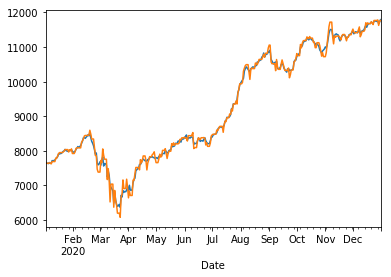

In [219]:
df1=trend+seasonal
df1.plot()
df['Total'].plot()

In [220]:
def adfuller_test(sales):
    result= adfuller(sales)
    labels = ["ADF Test Statistics","p-value","#Lags Used","Number of Observations Used"]
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
        if result[1] <= 0.05:
            print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
        else:
            print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [221]:
train_df=df['Total'].iloc[0:292]
test_df=df['Total'].iloc[292:]

In [222]:
adfuller_test(train_df)

ADF Test Statistics : -0.3495169149004542
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 
p-value : 0.9181925810384477
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 
#Lags Used : 13
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 
Number of Observations Used : 278
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [223]:
df1=train_df.diff()[1:]

In [224]:
adfuller_test(df1)

ADF Test Statistics : -3.738318564103872
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary
p-value : 0.0036053391853093125
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary
#Lags Used : 12
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary
Number of Observations Used : 278
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


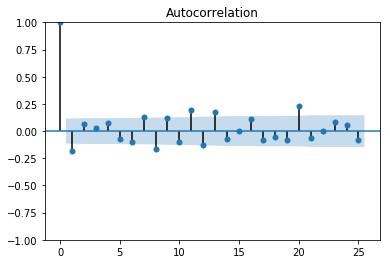

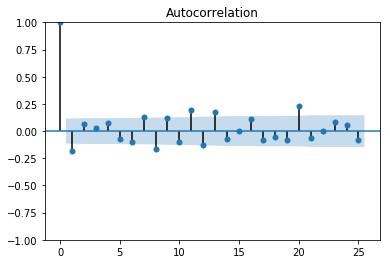

In [225]:
acf_plot = plot_acf(df1)
acf_plot

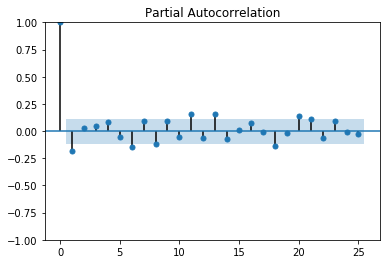

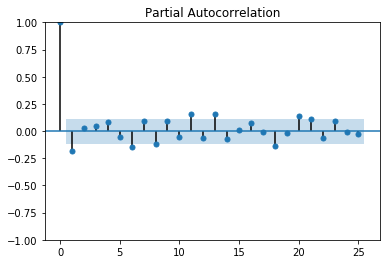

In [226]:
pacf_plot = plot_pacf(df1,method='ywm')
pacf_plot

In [227]:
my_order=(0,1,0)# My time series is seasonal thats why i am setting my normal AR,MA=0, and 1 differencing helped me get my time series stationary
my_seasonal_order=(2,0,1,7) # my time series is yearly and Pacf, Acf both has a significant lag at point 3 and seasonal lag of MA in (1,0,1,3 )is insignificant, so(1,0,0,3)
model = SARIMAX(train_df, order=my_order, seasonal_order=my_seasonal_order)

In [228]:
model_fit = model.fit()
print(model_fit.summary())

                                      SARIMAX Results                                      
Dep. Variable:                               Total   No. Observations:                  292
Model:             SARIMAX(0, 1, 0)x(2, 0, [1], 7)   Log Likelihood               -1866.470
Date:                             Mon, 21 Feb 2022   AIC                           3740.940
Time:                                     14:56:35   BIC                           3755.633
Sample:                                 01-02-2020   HQIC                          3746.826
                                      - 10-19-2020                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L7        0.8366      0.232      3.602      0.000       0.381       1.292
ar.S.L14      -0.1787      

In [229]:
predictions = model_fit.forecast(len(test_df))

In [230]:
predictions

2020-10-20    11140.168371
2020-10-21    11125.677015
2020-10-22    11130.321751
2020-10-23    11123.482507
2020-10-24    11123.482507
                  ...     
2020-12-27    11001.100770
2020-12-28    11001.074966
2020-12-29    11001.085666
2020-12-30    11001.081472
2020-12-31    11001.054954
Freq: D, Name: predicted_mean, Length: 73, dtype: float64

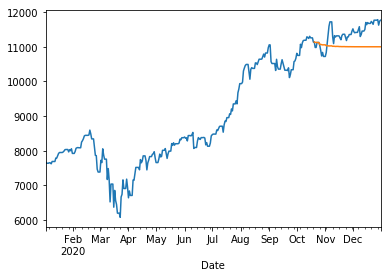

In [231]:
df['Total'].plot()
predictions.plot()

In [232]:
from datetime import timedelta
rolling_predictions = test_df.copy()
for train_end in test_df.index:
    train_data = df['Total'][:train_end-timedelta(days=1)]
    model = SARIMAX(train_data, order=my_order, seasonal_order=my_seasonal_order)
    model_fit = model.fit()

    pred = model_fit.forecast()
    rolling_predictions[train_end] = pred
print(rolling_predictions)

Date
2020-10-20    11140.168371
2020-10-21    11124.753035
2020-10-22    10986.734053
2020-10-23    10973.854145
2020-10-24    11125.946114
                  ...     
2020-12-27    11769.909546
2020-12-28    11771.555546
2020-12-29    11765.147793
2020-12-30    11637.916253
2020-12-31    11738.511597
Freq: D, Name: Total, Length: 73, dtype: float64


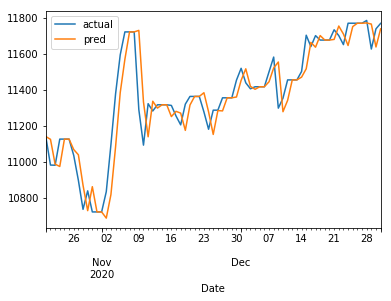

In [233]:
test_df.plot(label='actual')
rolling_predictions.plot(label='pred')
plt.legend()

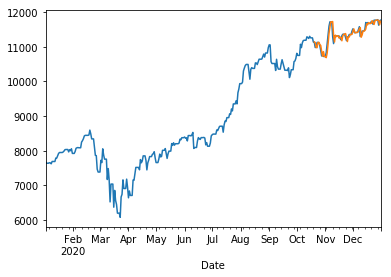

In [234]:
df['Total'].plot()
rolling_predictions.plot()

In [235]:
rolling_residuals = test_df - rolling_predictions

Date
2020-10-20     -0.920759
2020-10-21   -143.022100
2020-10-22     -5.931822
2020-10-23    152.091969
2020-10-24      0.000000
                 ...    
2020-12-27      0.000000
2020-12-28     13.798137
2020-12-29   -138.629688
2020-12-30    100.804046
2020-12-31     30.497421
Freq: D, Name: Total, Length: 73, dtype: float64

Text(0, 0.5, 'Error')

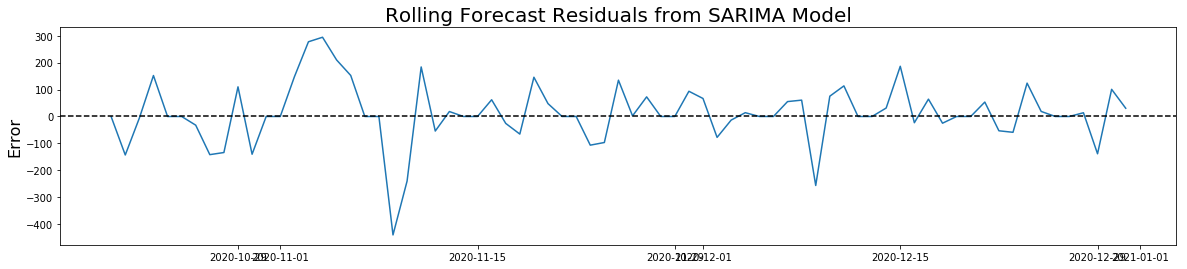

In [236]:
plt.figure(figsize=(20,4))
plt.plot(rolling_residuals)
plt.axhline(0, linestyle='--', color='k')
plt.title('Rolling Forecast Residuals from SARIMA Model', fontsize=20)
plt.ylabel('Error', fontsize=16)

In [263]:
print('Mean Absolute Percent Error :',round((np.mean(abs(rolling_residuals/test_df))),4))
#prediction is 0.006% off from actual outcome on average

Mean Absolute Percent Error : 0.0065


In [255]:
print('Root Mean Squared Error:', np.sqrt(np.mean(rolling_residuals**2)))

Root Mean Squared Error: 113.4104539072799


In [261]:
df['Total'].mean()

9233.423026578721

In [262]:
#Root Mean Squared Error  113.4104539072799 is far smaller than mean 9233.423026578721

In [265]:
test_df

Date
2020-10-20    11139.247612
2020-10-21    10981.730934
2020-10-22    10980.802231
2020-10-23    11125.946114
2020-10-24    11125.946114
                  ...     
2020-12-27    11769.909546
2020-12-28    11785.353683
2020-12-29    11626.518105
2020-12-30    11738.720299
2020-12-31    11769.009018
Freq: D, Name: Total, Length: 73, dtype: float64

In [266]:
rolling_predictions

Date
2020-10-20    11140.168371
2020-10-21    11124.753035
2020-10-22    10986.734053
2020-10-23    10973.854145
2020-10-24    11125.946114
                  ...     
2020-12-27    11769.909546
2020-12-28    11771.555546
2020-12-29    11765.147793
2020-12-30    11637.916253
2020-12-31    11738.511597
Freq: D, Name: Total, Length: 73, dtype: float64